In [26]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [27]:
#Load the data set
bank = pd.read_csv(r"C:\dta\book1.csv")
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [28]:
bank.drop(["pdays"],inplace=True,axis = 1)

In [29]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


In [53]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
 
bank['job']= label.fit_transform(bank['job']) 
bank['education']= label.fit_transform(bank['education'])
bank['contact']=label.fit_transform(bank['contact'])
bank['marital']=label.fit_transform(bank['marital'])
bank['default']=label.fit_transform(bank['default'])
bank['housing']=label.fit_transform(bank['housing'])
bank['loan']=label.fit_transform(bank['loan'])
bank['month']=label.fit_transform(bank['month'])
bank['poutcome']=label.fit_transform(bank['poutcome'])
bank['y']=label.fit_transform(bank['y'])

In [54]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,0,3,0


In [55]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  previous   45211 non-null  int64
 14  poutcome   45211 non-null  int64
 15  y          45211 non-null  int32
dtypes: int32(1), int64(15)
memory usage: 5.3 MB


In [56]:
bank.shape

(45211, 16)

In [57]:
bank = bank.dropna()
bank.shape

(45211, 16)

In [64]:
X = bank.iloc[:,0:15]
Y = bank.iloc[:,15]

In [66]:
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
y_pred = classifier.predict(X)

In [68]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [70]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39150   772]
 [ 4347   942]]


In [72]:
((39150+942)/(39150+942+772+4347))*100

88.67753422839574

In [73]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.55      0.18      0.27      5289

    accuracy                           0.89     45211
   macro avg       0.72      0.58      0.60     45211
weighted avg       0.86      0.89      0.86     45211



Text(0, 0.5, 'True Positive Rate')

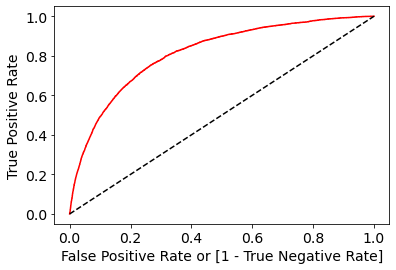

In [74]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [75]:
auc

0.5793838967268079